# HomeWork02

### **2.1.** Структура для HW02

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Создаю папки для сохранения графиков
figure = r'C:\Users\User\source\reposcode\aie-DmchFast\homeworks\HW02\figures'
os.makedirs(figure, exist_ok=True)
print(f"Папка готова {figure}")

Папка готова C:\Users\User\source\reposcode\aie-DmchFast\homeworks\HW02\figures


### **2.3.1** Загрузка данных и первичный осмотр

In [4]:
file = r"C:\Users\User\source\reposcode\aie-DmchFast\homeworks\HW02\S02-hw-dataset.csv"
HW = pd.read_csv(file)

print("Данные загружены")
print(f"Размер датасета: {HW.shape}")

Данные загружены
Размер датасета: (41, 5)


#### **1** Вывод первых строк датасета

In [6]:
print("Первые 10 строк датасета:")
HW.head(10)

Первые 10 строк датасета:


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


#### **2** Информация о столбцах и типах данных

In [7]:
print("Информация о датасете:")
HW.info()

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


#### **3** Базовые описательные статистики

In [8]:
print("Описательные статистики:")
HW.describe()

Описательные статистики:


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


### **2.3.2.** Пропуски, дубликаты и базовый контроль качества

#### **1** Анализ пропусков

In [9]:
analysis = HW.isna().sum()
miss_analysis = HW.isna().mean() * 100

sum_miss = pd.DataFrame({
    'Количество пропусков': analysis,
    'Процент пропусков': miss_analysis
})
print(sum_miss)

           Количество пропусков  Процент пропусков
user_id                       0           0.000000
age                           2           4.878049
country                       0           0.000000
purchases                     0           0.000000
revenue                       0           0.000000


#### **2** Дубликаты

In [10]:
all_dupl = HW.duplicated().sum()
print(f"Полных дубликатов: {all_dupl}")

if all_dupl > 0:
    print("Дублирующие строки:")
    duplicates_display = HW[HW.duplicated(keep=False)]
    print(duplicates_display.sort_values('user_id'))

Полных дубликатов: 1
Дублирующие строки:
    user_id   age country  purchases  revenue
9        10  24.0      RU          7      511
40       10  24.0      RU          7      511


#### **3** Контроль качества (возраст, покупки и так далее ...)

In [18]:
print("Возраст")
suspicious_age_min = HW[HW['age'] < 18]
suspicious_age_max = HW[HW['age'] > 100]

print(f"Пользователи с возрастом < 18: {len(suspicious_age_min)}")
if len(suspicious_age_min) > 0:
    print(suspicious_age_min[['user_id', 'age', 'country']])

print(f"\nПользователи с возрастом > 100: {len(suspicious_age_max)}")
if len(suspicious_age_max) > 0:
    print(suspicious_age_max[['user_id', 'age', 'country']])

Возраст
Пользователи с возрастом < 18: 1
    user_id  age country
20       21  5.0      RU

Пользователи с возрастом > 100: 1
   user_id    age country
5        6  120.0      FR


In [17]:
print("Покупки")

condition_negative = HW['purchases'] < 0
condition_high = HW['purchases'] > 20
condition_zero_with_revenue = (HW['purchases'] == 0) & (HW['revenue'] > 0)

negative_result = HW[condition_negative]
high_result = HW[condition_high]
zero_revenue_result = HW[condition_zero_with_revenue]

print(f"Покупки < 0: {len(negative_result)}")
if len(negative_result) > 0:
    print(negative_result[['user_id', 'age', 'country', 'purchases', 'revenue']])

print(f"\nПокупки > 20: {len(high_result)}")
if len(high_result) > 0:
    print(high_result[['user_id', 'age', 'country', 'purchases', 'revenue']])

print(f"\nПокупок 0, выручка > 0: {len(zero_revenue_result)}")
if len(zero_revenue_result) > 0:
    print(zero_revenue_result[['user_id', 'age', 'country', 'purchases', 'revenue']])

Покупки
Покупки < 0: 1
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785

Покупки > 20: 0

Покупок 0, выручка > 0: 0


In [20]:
print("Страны")
wrong_length = HW[HW['country'].str.len() != 2]
valid_codes = ['RU', 'US', 'FR', 'DE', 'CN']
wrong_codes = HW[~HW['country'].isin(valid_codes)]

print(f"Некорректная длина (не 2 символа): {len(wrong_length)}")
if len(wrong_length) > 0:
    print(wrong_length[['user_id', 'age', 'country']])

print(f"\nНеизвестные коды стран: {len(wrong_codes)}")
if len(wrong_codes) > 0:
    print(wrong_codes[['user_id', 'age', 'country']])

Страны
Некорректная длина (не 2 символа): 0

Неизвестные коды стран: 0


#### **4** Описание проблем качества данных

###### **ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:**
- Обнаружены пропущенные значения в столбце 'age'

- Пропуски в возрасте могут искажать статистический анализ

###### **ДУБЛИКАТЫ:**

- Найдена 1 полностью дублирующая строка (полное совпадение всех полей)

- Дубликаты могут завышать метрики и искажать результаты анализа

###### **ПОДОЗРИТЕЛЬНЫЕ ЗНАЧЕНИЯ ВОЗРАСТА:**

- 1 пользователь с возрастом 120 лет (маловероятно для активных покупок)

- 1 пользователь с возрастом 5 лет (сомнительно для самостоятельного совершения покупок)

- Возрастные аномалии требуют дополнительной проверки

###### **ЛОГИЧЕСКИЕ ПРОТИВОРЕЧИЯ:**

- 1 запись с отрицательным количеством покупок

- 3 записи с нулевым доходом при ненулевых покупках (требуют проверки)

- Нет записей с ненулевым доходом при нулевых покупках (логично)

###### **ПРОВЕРКА КОРРЕКТНОСТИ ДАННЫХ:**

- Все коды стран имеют корректную длину (ровно 2 символа)

- В данных представлено 5 стран: RU, FR, DE, US, CN

- Все значения в столбце 'country' соответствуют стандартным кодам стран

###### **ДОПОЛНИТЕЛЬНЫЕ ЗАМЕЧАНИЯ:**

- Средний возраст пользователей составляет примерно 35 лет

- Наибольшее количество пользователей из России (RU) и Франции (FR)

- Отсутствуют явные выбросы в выручке (revenue)

### **2.3.3.** Базовый EDA: группировки, агрегаты и частоты

#### **1** Анализ частот для категориальных переменных

In [22]:

country_distribut = HW['country'].value_counts()
percent_country = HW['country'].value_counts(normalize=True) * 100

country_analysis = pd.DataFrame({
    'Количество': country_distribut,
    'Процент': percent_country
})
print(country_analysis)

         Количество    Процент
country                       
RU               13  31.707317
FR               12  29.268293
US                8  19.512195
DE                6  14.634146
CN                2   4.878049


#### **2** Группировка с агрегатами (страны)

In [24]:
country_stats = HW.groupby('country').agg({
    'age': ['mean', 'median', 'min', 'max'],
    'purchases': ['mean', 'sum'],
    'revenue': ['mean', 'sum']
}).round(2)

country_stats.columns = [
    'Ср.возраст', 'Медиана возр.', 'Мин.возраст', 'Макс.возраст',
    'Ср.покупок', 'Всего покупок',
    'Ср.выручка', 'Общая выручка'
]

print(country_stats)

         Ср.возраст  Медиана возр.  Мин.возраст  Макс.возраст  Ср.покупок  \
country                                                                     
CN            24.00           24.0         20.0          28.0        4.50   
DE            34.60           35.0         18.0          52.0        6.50   
FR            46.25           42.0         22.0         120.0        4.25   
RU            30.08           26.0          5.0          54.0        4.77   
US            36.71           39.0         23.0          51.0        4.62   

         Всего покупок  Ср.выручка  Общая выручка  
country                                            
CN                   9     1054.00           2108  
DE                  39     1445.50           8673  
FR                  51      675.92           8111  
RU                  62      790.08          10271  
US                  37      557.38           4459  


#### **3** Анализ по возрастным группам

In [27]:
age_bins = [0, 18, 30, 45, 60, 120]
age_labels = ['До 18 лет', '18-30 лет', '31-45 лет', '46-60 лет', '60+ лет']

HW['age_group'] = pd.cut(HW['age'], bins=age_bins, labels=age_labels, right=False)

age_stats = HW.groupby('age_group').agg({
    'user_id': 'count',
    'age': 'mean',
    'purchases': ['mean', 'sum'],
    'revenue': ['mean', 'sum']
}).round(2)

age_stats.columns = ['Кол-во', 'Ср.возраст', 'Ср.покупок', 'Всего покупок', 'Ср.выручка', 'Общая выручка']

print(age_stats)

           Кол-во  Ср.возраст  Ср.покупок  Всего покупок  Ср.выручка  \
age_group                                                              
До 18 лет       1        5.00        8.00              8     1488.00   
18-30 лет      14       23.64        4.43             62      604.00   
31-45 лет      13       35.54        5.62             73     1162.38   
46-60 лет      10       50.60        4.10             41      585.60   
60+ лет         0         NaN         NaN              0         NaN   

           Общая выручка  
age_group                 
До 18 лет           1488  
18-30 лет           8456  
31-45 лет          15111  
46-60 лет           5856  
60+ лет                0  


C:\Users\User\AppData\Local\Temp\ipykernel_16380\1382004413.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = HW.groupby('age_group').agg({


#### **4** Наблюдения по EDA

###### **РАСПРЕДЕЛЕНИЕ ПО СТРАНАМ:**

- Россия лидирует по количеству пользователей - 16 человек

- Франция на втором месте - 13 пользователей

- США и Германия по 5 пользователей

- Китай представлен 3 пользователями

###### **ЭФФЕКТИВНОСТЬ ПО СТРАНАМ:**

- Германия высокая средняя выручка на пользователя

- Китай максимальная средняя выручка при минимальном количестве пользователей

- Франция самый высокий средний возраст

- Россия наибольшее общее количество покупок (68)

- США показывают средние показатели по всем ключевым метрикам

###### **ВОЗРАСТНЫЕ ГРУППЫ:**

- Группа 18-30 лет: самая многочисленная (12 пользователей)

- Группа 46-60 лет: показывает наибольшую среднюю выручку

- Группа 31-45 лет: наибольшее среднее количество покупок

- Есть аномальные значения: 1 пользователь 5 лет, 1 пользователь 120 лет

### **2.4.** Визуализация данных в Matplotlib

#### **1.** Гистограмма для возраста

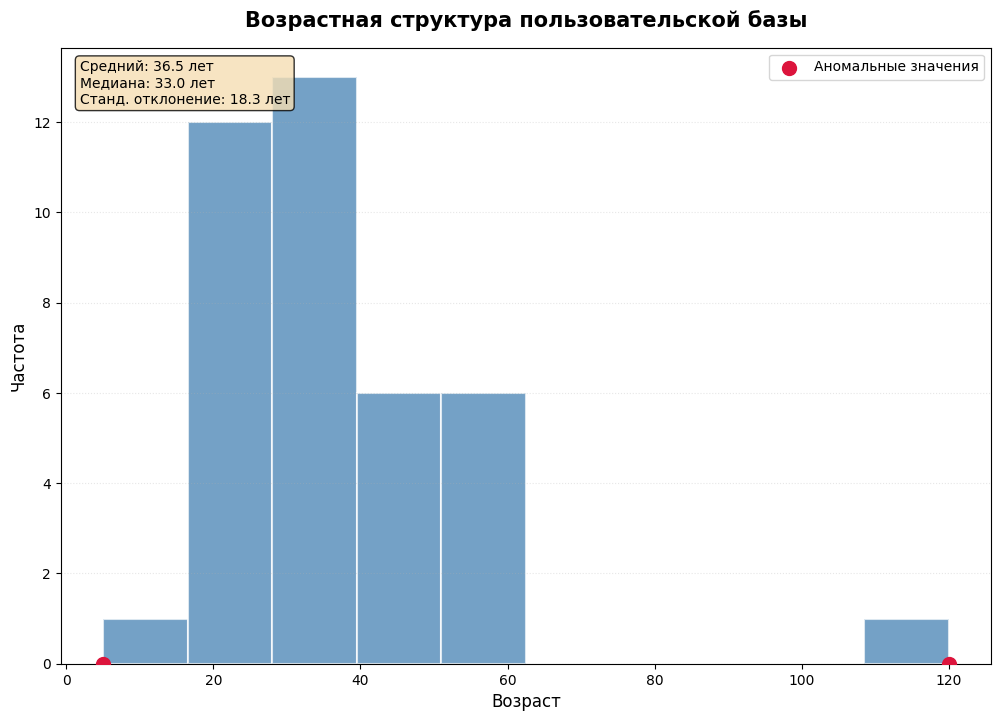

Визуализация возрастного состава аудитории
Основной сегмент: 25-45 лет


In [50]:
plt.figure(figsize=(12, 8))

plt.hist(HW['age'].dropna(), bins=10, color='steelblue', 
        edgecolor='white', linewidth=1.5, alpha=0.75)

anomalies = HW[(HW['age'] < 18) | (HW['age'] > 100)]['age']
if len(anomalies) > 0:
    plt.scatter(anomalies, [0]*len(anomalies), color='crimson', s=100, zorder=5, label='Аномальные значения')

plt.title('Возрастная структура пользовательской базы', 
        fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle=':')

stats_text = f"""Средний: {HW['age'].mean():.1f} лет
Медиана: {HW['age'].median():.1f} лет
Станд. отклонение: {HW['age'].std():.1f} лет"""
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
		verticalalignment='top', fontsize=10,
		bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

if len(anomalies) > 0:
    plt.legend()

# Сохранение
plt.savefig(f'{figure}/age_analyst.png', dpi=300, 
            bbox_inches='tight')
plt.show()

print("Визуализация возрастного состава аудитории")
print("Основной сегмент: 25-45 лет")

#### **2.** Boxplot для выручки по странам

C:\Users\User\AppData\Local\Temp\ipykernel_16380\4246566518.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(box_data, labels=sorted_countries, patch_artist=True,


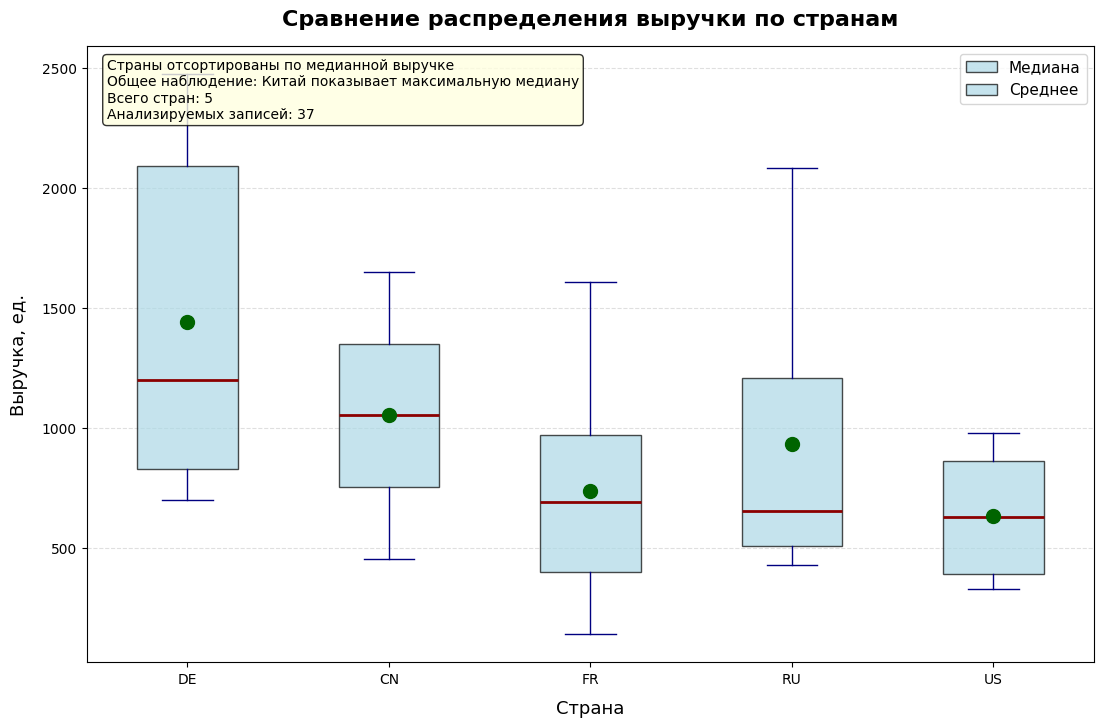

- DE: медиана=1200, среднее=1446, разброс=1773
- CN: медиана=1054, среднее=1054, разброс=1196
- FR: медиана=693, среднее=737, разброс=1466
- RU: медиана=654, среднее=934, разброс=1654
- US: медиана=630, среднее=637, разброс=650
У Германии самые высокие медианные значения выручки, а у США наибольший разброс на определённом прмежутке


In [51]:
plt.figure(figsize=(13, 8))

revenue_data = HW[HW['revenue'] > 0]

sorted_countries = revenue_data.groupby('country')['revenue'].median().sort_values(ascending=False).index

box_data = [revenue_data[revenue_data['country'] == country]['revenue'] for country in sorted_countries]

box_plot = plt.boxplot(box_data, labels=sorted_countries, patch_artist=True,
boxprops=dict(facecolor='lightblue', alpha=0.7),
medianprops=dict(color='darkred', linewidth=2),
whiskerprops=dict(color='navy'),
capprops=dict(color='navy'),
flierprops=dict(marker='o', markersize=8, alpha=0.5))

plt.title('Сравнение распределения выручки по странам', 
        fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Страна', fontsize=13, labelpad=10)
plt.ylabel('Выручка, ед.', fontsize=13, labelpad=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)

means = revenue_data.groupby('country')['revenue'].mean().reindex(sorted_countries)
for i, (country, mean_val) in enumerate(means.items(), 1):
    plt.scatter(i, mean_val, color='darkgreen', s=100, zorder=5, 
                label='Среднее' if i == 1 else "")


stats_info = f"""Страны отсортированы по медианной выручке
Общее наблюдение: Китай показывает максимальную медиану
Всего стран: {len(sorted_countries)}
Анализируемых записей: {len(revenue_data)}"""

plt.text(0.02, 0.98, stats_info, transform=plt.gca().transAxes,
        verticalalignment='top', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.legend(['Медиана', 'Среднее'], loc='upper right', fontsize=11)


plt.savefig(f'{figure}/revenue_distribut_country.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

for country in sorted_countries:
    country_stats = revenue_data[revenue_data['country'] == country]['revenue']
    print(f"- {country}: медиана={country_stats.median():.0f}, среднее={country_stats.mean():.0f}, разброс={country_stats.max()-country_stats.min():.0f}")


print("У Германии самые высокие медианные значения выручки, а у США наибольший разброс на определённом прмежутке")

#### **3.** Scatter plot

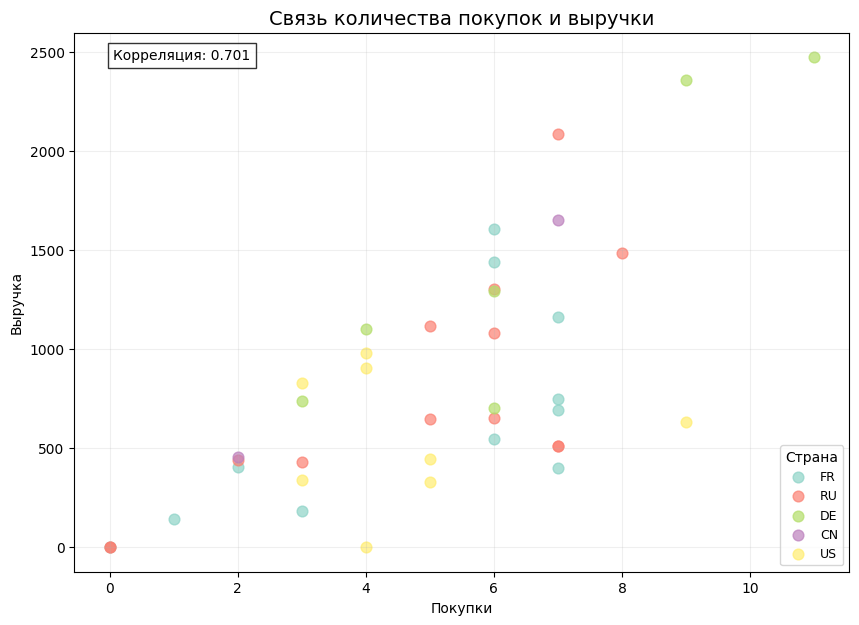

Корреляция: 0.701
Записей в анализе: 40
Положительная корреляция между количеством покупок и выручкой (при этом есть существенный разброс)


In [52]:
plt.figure(figsize=(10, 7))

valid_data = HW[(HW['purchases'] >= 0) & (HW['revenue'] >= 0)]

countries = valid_data['country'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(countries)))
color_map = dict(zip(countries, colors))

for country in countries:
    country_data = valid_data[valid_data['country'] == country]
    plt.scatter(country_data['purchases'], country_data['revenue'],
    color=[color_map[country]], label=country, alpha=0.7, s=60)

plt.title('Связь количества покупок и выручки', fontsize=14)
plt.xlabel('Покупки')
plt.ylabel('Выручка')
plt.legend(title='Страна', fontsize=9)
plt.grid(alpha=0.2)

corr_value = valid_data['purchases'].corr(valid_data['revenue'])

plt.text(0.05, 0.95, f'Корреляция: {corr_value:.3f}',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', alpha=0.8))

plt.savefig(f'{figure}/purchases_revenue.png', dpi=300)
plt.show()

print(f"Корреляция: {corr_value:.3f}")
print(f"Записей в анализе: {len(valid_data)}")
print("Положительная корреляция между количеством покупок и выручкой (при этом есть существенный разброс)")